<a href="https://colab.research.google.com/github/Sid-Oya/DS-Unit-2-Applied-Modeling/blob/master/Sidoney_DS_231_DefineMLProblems__232_WrangleMLDatasets__233_Permutation%26Boosting__234_ModelInterpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wrangle ML datasets 
- Explore tabular data for supervised machine learning
- Join relational data for supervised machine learning

### A note in preparation for Unit 3

When you're doing your initial data exploration, you're educating yourself about the data, assessing data integrity, and formulating a plan of attack for your predictive model.

The best answer to any of these questions may vary from dataset to dataset. *Experiment* with a simple model to help you through the exploratory data analysis phase.

#### Meaningful Variation
  - Are there any features that are simply constant or quasi-constant values? 
  - Duplicated features?
  - Duplicated rows?
  - Are any of your features highly correlated together?
    - Linear models can be particularly sensitive to multi-collinearity.
    - Larger (esp. wide) datasets tend to have redundant features.

#### Categorical Encodings

  - What are your high cardinality categories?
  - Are there any rare labels that might benefit from grouping together?
  - Are there any categories that could be transformed into a meaningful rank (custom ordinal encoding)?

#### Distributions

  - What are the frequencies of your categorical labels?
  - Is your target feature normally distributed? (Assumption for linear regression model)

#### Outliers
  - How sensitive is your model type to outliers?
    - Less sensitive models include tree-based models. 
    - Linear models, neural networks, and other distance-based models will almost always benefit from scaling.
  - What strategy will you use to identify and handle outliers?

#### Feature Selection

  Why should we reduce the number of features?
  - Reduces potential overfitting
  - Fewer features -> easier interpretation for your stakeholders.
  - Easier implementation and maintain by software engineers.
  - Reduced computational resource requirement.

#### Reproducibility

  - Always set a random seed.
  - Comment, comment, comment!
  - Print out versions of your software.
  - Implement version control for your *data* as well as your *code* (esp. with timestamps!)
  - Wrap your code in reproducible functions / classes for modularity of steps, including feature loading, data wrangling, feature processing, etc. (i.e., *use sklearn pipelines!*)
  - Combine your modularized functions / classes in a single, centralized pipeline to execute your code 
  - Print out / record your final model parameters (optimized hyperparameter values).
  - Record other details of the model: final features passed in, transformations employed, etc. (Jupyter makes this very transparent, but long notebooks can be more confusing than long-form scripts.)

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [ ]:
import pandas as pd
import numpy as np
url = 'https://www.ctdatacollaborative.org/sites/default/files/The%20Global%20Dataset%2014%20Apr%202020.csv'
trafficking = pd.read_csv(url)
trafficking.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,55,57) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,meansOfControlConcatenated,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
1,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
2,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
3,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
4,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1


In [ ]:
trafficking['citizenship'].value_counts()

PH     11365
00      8858
UA      7761
MD      5901
US      3636
KH      1979
ID      1971
BY      1463
MM      1250
RO       655
GH       544
KG       437
BG       342
HT       339
-99      278
UZ       261
VN       170
GW       145
LA       126
CO       124
NG       108
UG        98
AF        97
MG        94
LK        85
SL        81
SN        70
TH        55
KZ        54
CD        53
ML        45
TJ        43
BF        33
KE        32
NE        31
CI        31
NP        27
TM        26
CN        23
AL        22
MX        19
BO        18
GN        15
ER        13
KR        12
BD        11
Name: citizenship, dtype: int64

In [ ]:
trafficking['citizenship'] = trafficking['citizenship'].replace(['PH', 'UA','MD', 'US', 'KH', 'ID','BY', 'MM', 'RO', 'GH' ],
                                                                ['Philippines', 'Ukraine','Moldova','USA', 'Cambodia', 'Indonesia', 'Belarus', 'Myanmar','Romania', 'Ghana' ])

In [ ]:
trafficking['citizenship'] = trafficking['citizenship'].replace(['KG', 'BG', 'HT', 'UZ', 'VN', 'GW', 'LA', 'CO', 'NG', 'UG'], 
                                                                ['Kyrgyzstan', 'Bulgaria', 'Haiti', 'Uzbekistan', 'Viet Nam', 'Guinea-Bissau', 'Lao People Democratic Republic', 'Colombia', 'Nigeria', 'Uganda' ])

In [ ]:
trafficking['citizenship'] = trafficking['citizenship'].replace(['AF','MG', 'LK', 'SL', 'SN', 'TH', 'KZ','CD', 'ML', 'TJ'],
                                                                ['Afghanistan', 'Madagascar', 'Sri Lanka', 'Sierra Leone', 'Senegal', 'Thailand', 'Kazakhstan', 'Democratic Republic of the Congo', 'Mali', 'Tajikistan'])

In [ ]:
trafficking['citizenship'] = trafficking['citizenship'].replace(['BF', 'KE', 'NE', 'CI', 'NP', 'TM', 'CN', 'AL', 'MX', 'BO'],
                                                                ['Burkina Faso', 'Kenya', 'Niger', 'Côte dIvoire', 'Nepal', 'Turkmenistan', 'China', 'Albania', 'Mexico', 'Bolivia'])

In [ ]:
trafficking['citizenship'] = trafficking['citizenship'].replace(['GN', 'ER', 'KR', 'BD'],
                                                                ['Guinea', 'Eritrea', 'Korea', 'Bangladesh'])

In [ ]:
trafficking['citizenship'].value_counts()

Philippines                         11365
00                                   8858
Ukraine                              7761
Moldova                              5901
USA                                  3636
Cambodia                             1979
Indonesia                            1971
Belarus                              1463
Myanmar                              1250
Romania                               655
Ghana                                 544
Kyrgyzstan                            437
Bulgaria                              342
Haiti                                 339
-99                                   278
Uzbekistan                            261
Viet Nam                              170
Guinea-Bissau                         145
Lao People Democratic Republic        126
Colombia                              124
Nigeria                               108
Uganda                                 98
Afghanistan                            97
Madagascar                        

In [ ]:
trafficking['CountryOfExploitation'].value_counts()

US     12512
-99    10175
UA      5399
MD      4504
RU      2738
PH      1988
ID      1777
KH      1000
MY       930
00       844
GH       544
AE       504
BY       400
TH       391
SN       370
BG       356
HT       339
PL       326
SA       278
RO       259
RS       248
QA       239
KZ       222
KW       209
TR       197
MK       194
UZ       193
UG       151
BA       127
JP       111
JO       108
OM        94
MG        94
TT        85
AF        83
SL        81
CN        79
LB        73
TJ        54
IN        46
SY        41
CZ        38
SG        37
ZA        36
TW        33
HK        31
BD        26
TM        26
AT        24
IT        24
AL        22
BH        22
MU        20
AR        18
DK        17
VN        16
EC        13
EG        13
LY        11
CY        11
Name: CountryOfExploitation, dtype: int64

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['PH', 'UA','MD', 'US', 'KH', 'ID','BY', 'MM', 'RO', 'GH' ],
                                                                ['Philippines', 'Ukraine','Moldova','USA', 'Cambodia', 'Indonesia', 'Belarus', 'Myanmar','Romania', 'Ghana' ])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['KG', 'BG', 'HT', 'UZ', 'VN', 'GW', 'LA', 'CO', 'NG', 'UG'], 
                                                                ['Kyrgyzstan', 'Bulgaria', 'Haiti', 'Uzbekistan', 'Viet Nam', 'Guinea-Bissau', 'Lao People Democratic Republic', 'Colombia', 'Nigeria', 'Uganda' ])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['AF','MG', 'LK', 'SL', 'SN', 'TH', 'KZ','CD', 'ML', 'TJ'],
                                                                ['Afghanistan', 'Madagascar', 'Sri Lanka', 'Sierra Leone', 'Senegal', 'Thailand', 'Kazakhstan', 'Democratic Republic of the Congo', 'Mali', 'Tajikistan'])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['BF', 'KE', 'NE', 'CI', 'NP', 'TM', 'CN', 'AL', 'MX', 'BO'],
                                                                ['Burkina Faso', 'Kenya', 'Niger', 'Côte dIvoire', 'Nepal', 'Turkmenistan', 'China', 'Albania', 'Mexico', 'Bolivia'])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['GN', 'ER', 'KR', 'BD','MY', 'AE', 'PL', 'SA', 'RS', 'QA'],
                                                                ['Guinea', 'Eritrea', 'Korea', 'Bangladesh', 'Malaysia', 'United Arab Emirates', 'Poland', 'Saudi Arabia', 'Serbia', 'Qatar' ])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['RU', 'KW', 'TR', 'MK', 'BA', 'JP', 'JO', 'OM', 'TT', 'LB'],
                                                                                    ['Russian Federation', 'Kuwait', 'Turkey', 'North Macedonia', 'Bosnia and Herzegovina', 'Japan', 'Jordan', 'Oman', 'Trinidad and Tobago', 'Lebanon'])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['IN', 'SY', 'CZ', 'SG', 'ZA', 'TW', 'HK', 'IT', 'AT', 'BH' ],
                                                                                    ['India', 'Syria','Czechia', 'Singapore', 'South Africa', 'Taiwan', 'Hong Kong', 'Italy', 'Austria', 'Bahrain'])

In [ ]:
trafficking['CountryOfExploitation'] = trafficking['CountryOfExploitation'].replace(['MU', 'AR', 'DK', 'EC', 'EG', 'LY', 'CY'], 
                                                                                    ['Mauritius', 'Argentina', 'Denmark', 'Ecuador', 'Egypt', 'Libya', 'Cyprus'])

In [ ]:
trafficking['CountryOfExploitation'].value_counts()

USA                       12512
-99                       10175
Ukraine                    5399
Moldova                    4504
Russian Federation         2738
Philippines                1988
Indonesia                  1777
Cambodia                   1000
Malaysia                    930
00                          844
Ghana                       544
United Arab Emirates        504
Belarus                     400
Thailand                    391
Senegal                     370
Bulgaria                    356
Haiti                       339
Poland                      326
Saudi Arabia                278
Romania                     259
Serbia                      248
Qatar                       239
Kazakhstan                  222
Kuwait                      209
Turkey                      197
North Macedonia             194
Uzbekistan                  193
Uganda                      151
Bosnia and Herzegovina      127
Japan                       111
Jordan                      108
Oman    

In [ ]:
trafficking['yearOfRegistration'].describe


<bound method NDFrame.describe of 0        2002
1        2002
2        2002
3        2002
4        2002
         ... 
48796    2019
48797    2019
48798    2019
48799    2019
48800    2019
Name: yearOfRegistration, Length: 48801, dtype: int64>

In [ ]:
trafficking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Data columns (total 64 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use  0 non-null      float64
 1   yearOfRegistration                                                                               48801 non-null  int64  
 2   Datasource                                                                                       48801 non-null  object 
 3   gender                                                                                           48801 non-null  object 
 4   ageBroad                                                                                         48801 non-null  object 
 5   majo

In [ ]:
trafficking.head()

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,meansOfControlConcatenated,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
1,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
2,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
3,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
4,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1


In [ ]:
trafficking.columns

Index(['By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use',
       'yearOfRegistration', 'Datasource', 'gender', 'ageBroad',
       'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'isForcedLabour', 'isSexualE

In [ ]:

print(trafficking.index)

RangeIndex(start=0, stop=48801, step=1)


In [ ]:
import scipy
import sklearn
import statsmodels

In [ ]:
trafficking.describe(include='number')

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
count,0.0,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.00000,48801.000000,48801.00000
mean,NaN,2014.144218,-93.910248,-90.834614,-98.484375,-88.442675,-86.615233,-89.088666,-93.244524,-91.153521,-91.834717,-87.508535,-93.904121,-92.226778,-98.691215,-94.910514,-93.729924,-92.315670,-92.672814,-23.684679,-45.848015,-50.265220,-36.092969,-51.414459,-76.628696,-75.771992,-75.771992,-95.771152,-57.466425,-57.546464,-57.571976,-56.778447,-53.195754,-55.015225,-57.733264,-57.312166,-57.575029,-57.731788,-57.575029,-55.007520,-55.112600,-61.465359,-85.924120,-85.927399,-88.419725,-65.788222,-17.832995,-17.823344,-17.82779,-17.774492,0.64720
std,NaN,4.025566,21.922926,27.338680,7.142809,30.690007,32.903795,29.840379,23.236696,26.849513,25.743183,31.853870,21.935427,25.081972,5.542640,19.741820,22.288547,24.926596,24.294202,42.876624,49.568009,49.826086,47.801919,49.465087,41.408492,41.953170,41.953170,17.606035,48.858433,48.844371,48.841042,48.988703,49.419270,49.194003,48.810984,48.889644,48.837412,48.812744,48.837412,49.196511,49.205669,48.126034,33.524384,33.515931,30.587780,46.744717,38.089505,38.094149,38.09201,38.117608,3.98111
min,NaN,2002.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.00000
25%,NaN,2013.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99

In [ ]:
trafficking.describe(exclude='number')

,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlConcatenated,typeOfExploitConcatenated,typeOfLabourConcatenated,typeOfSexConcatenated,RecruiterRelationship,CountryOfExploitation
count,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801
unique,2,2,10,3,4,3,46,1862,8,16,5,22,60
top,Case Management,Female,-99,Adult,-99,-99,Philippines,-99,-99,-99,-99,-99,USA
freq,36289,35534,12362,26238,31319,42310,11365,32281,16174,42552,24576,22489,12512


In [ ]:
trafficking = trafficking.drop(['By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use','meansOfControlConcatenated'], axis=1)

In [ ]:
trafficking['yearOfRegistration'].value_counts()

2016    16399
2017     6508
2018     5818
2015     4276
2014     3000
2013     1832
2005     1455
2006     1423
2007     1417
2012     1367
2011     1340
2002     1026
2010      943
2008      802
2009      587
2003      357
2004      223
2019       28
Name: yearOfRegistration, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


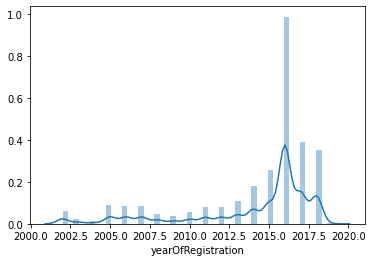

In [ ]:
import seaborn as sns
sns.distplot(trafficking['yearOfRegistration'])

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [ ]:
person = 1.0
trafficking['Persons'] = person

In [ ]:
trafficking.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,Persons
0,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1,1.0
1,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1,1.0
2,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1,1.0
3,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1,1.0
4,2002,Case Management,Female,18--20,Adult,-99,-99,Colombia,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1,1.0


In [ ]:
traffick = trafficking.groupby(by=['yearOfRegistration']).sum()

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
trafficking['gender'].describe()

count      48801
unique         2
top       Female
freq       35534
Name: gender, dtype: object

In [ ]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X, y = trafficking, trafficking['gender']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
dummy = DummyClassifier(strategy='uniform', random_state=1)

dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=1, strategy='uniform')

In [ ]:
dummy.score(X_test, y_test)

0.5006147037128105

In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
train, val, test = np.split(trafficking.sample(frac=1), [int(.6*len(trafficking)), int(.8*len(trafficking))])

In [ ]:
train.shape, val.shape, test.shape

((29280, 63), (9760, 63), (9761, 63))

In [ ]:
train.describe()

,yearOfRegistration,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,Persons
count,"29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280"
mean,"2,014",-94,-91,-98,-88,-86,-89,-93,-91,-92,-87,-94,-92,-99,-95,-94,-92,-93,-24,-46,-50,-36,-51,-77,-76,-76,-96,-57,-58,-58,-57,-53,-55,-58,-57,-58,-58,-58,-55,-55,-61,-86,-86,-88,-66,-18,-18,-18,-18,1,1
std,4,22,28,7,31,33,30,23,27,26,32,22,25,5,20,22,25,25,43,50,50,48,49,41,42,42,18,49,49,49,49,49,49,49,49,49,49,49,49,49,48,34,34,31,47,38,38,38,38,4,0
min,"2,002",-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1
25%,"2,013",-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1,1
50%,"2,016",-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,0,-99,0,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1,1
75%,"2,017",-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,0,1,0,0,-99,-99,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-99,-99,-99,0,0,0,0,0,1,1
max,"2,019",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1


In [ ]:
train.describe(include='number')

,yearOfRegistration,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,Persons
count,"29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280","29,280"
mean,"2,014",-94,-91,-98,-88,-86,-89,-93,-91,-92,-87,-94,-92,-99,-95,-94,-92,-93,-24,-46,-50,-36,-51,-77,-76,-76,-96,-57,-58,-58,-57,-53,-55,-58,-57,-58,-58,-58,-55,-55,-61,-86,-86,-88,-66,-18,-18,-18,-18,1,1
std,4,22,28,7,31,33,30,23,27,26,32,22,25,5,20,22,25,25,43,50,50,48,49,41,42,42,18,49,49,49,49,49,49,49,49,49,49,49,49,49,48,34,34,31,47,38,38,38,38,4,0
min,"2,002",-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1
25%,"2,013",-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1,1
50%,"2,016",-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,0,-99,0,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1,1
75%,"2,017",-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,0,1,0,0,-99,-99,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-99,-99,-99,0,0,0,0,0,1,1
max,"2,019",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1


In [ ]:
train.describe(exclude='number')

,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,typeOfExploitConcatenated,typeOfLabourConcatenated,typeOfSexConcatenated,RecruiterRelationship,CountryOfExploitation
count,29280,29280,29280,29280,29280,29280,29280,29280,29280,29280,29280,29280
unique,2,2,10,3,4,3,46,8,16,5,21,60
top,Case Management,Female,-99,Adult,-99,-99,Philippines,-99,-99,-99,-99,USA
freq,21714,21276,7397,15733,18757,25399,6796,9697,25531,14647,13512,7566


In [ ]:
print("Total Training Features with NaN Values = " + str(train.columns[train.isnull().sum() != 0].size))
if (train.columns[train.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(train.columns[train.isnull().sum() != 0])))
    train[train.columns[train.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Training Features with NaN Values = 0


In [ ]:
print("Total Test Features with NaN Values = " + str(test.columns[test.isnull().sum() != 0].size))
if (test.columns[test.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(test.columns[test.isnull().sum() != 0])))
    test[test.columns[test.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Test Features with NaN Values = 0


In [ ]:
print("Total Validation Features with NaN Values = " + str(val.columns[val.isnull().sum() != 0].size))
if (val.columns[val.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(val.columns[val.isnull().sum() != 0])))
    val[val.columns[val.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)


Total Validation Features with NaN Values = 0


In [ ]:
train.isnull().sum().sum(), test.isnull().sum().sum(), val.isnull().sum().sum()

(0, 0, 0)

In [ ]:
 train.loc[:, (train == 0).any(axis=0)]

,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
3328,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,0,1,0,0,0,0,0,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-99,-99,-99,0,0,0,0,0,1
29534,1,1,-99,1,1,-99,-99,1,-99,1,1,1,-99,1,1,1,-99,0,1,0,0,0,0,0,0,-99,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-99,-99,-99,0,0,0,0,1,0
17732,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,1,0,0,0,0,0,0,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,-99,-99,-99,0,0,0,0,0,1
11368,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
38248,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32772,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,1,0,0
7804,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
39093,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
13704,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,1,0,0,0,0,0,0,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,-99,-99,-99,0,0,0,0,0,1


In [ ]:
target = 'gender'
train_features = train.drop(columns=[target])

numeric_features = train_features.select_dtypes(include='number').columns.tolist()

cardinality = train_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 50].index.tolist()

features = numeric_features + categorical_features


In [ ]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]

In [ ]:
!pip install --upgrade category_encoders
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=1)
)

pipeline.fit(X_train, y_train)

print ('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))


Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)
Train Accuracy 0.8828551912568307
Validation Accuracy 0.8742827868852459


In [ ]:
y_test = test[target]
print('test score:', pipeline.score(X_test, y_test))

test score: 0.876344636819998


Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [ ]:
# Get feature importances
# rf = pipeline.named_steps['randomforestclassifier']
# importances = pd.Series(rf.feature_importances_, X_train.columns)


In [ ]:
# Plot feature importances
# %matplotlib inline
# import matplotlib.pyplot as plt

# n = 20
# plt.figure(figsize=(10,n/2))
# plt.title(f'Top {n} features')
# importances.sort_values()[-n:].plot.barh(color='grey');

In [ ]:
column  = 'citizenship'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without citizenship: 0.8539959016393442
Validation Accuracy with citizenship: 0.8763319672131148
Drop-Column Importance for citizenship: 0.022336065573770547


### Do-It-Yourself way, for intuition

In [ ]:
# BEFORE: Sequence of the feature to be permuted
feature = 'RecruiterRelationship'
X_val[feature].head()

37347              -99
9487               -99
8132               -99
13718              -99
20035    Not Specified
Name: RecruiterRelationship, dtype: object

In [ ]:
# BEFORE: Distribution of the feature to be permuted
X_val[feature].value_counts()

-99                                      4527
-99                                      1710
Not Specified                            1704
Other                                     721
Friend/Acquaintance                       380
Family/Relative                           356
Intimate Partner                          318
Family/Relative; Intimate Partner          10
Friend/Acquaintance; Other                  9
Intimate Partner; Other                     7
Family/Relative; Other                      4
Family/Relative; Friend/Acquaintance        4
Not Specified; Other                        4
Friend/Acquaintance; Intimate Partner       4
Intimate Partner; Not Specified             1
Family/Relative; Not Specified              1
Name: RecruiterRelationship, dtype: int64

In [ ]:
# PERMUTE!
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

In [ ]:
# AFTER: Sequence has changed
X_val_permuted[feature].head()

37347              -99
9487               -99
8132             Other
13718              -99
20035    Not Specified
Name: RecruiterRelationship, dtype: object

In [ ]:
# AFTER: Distribution hasn't changed
X_val_permuted[feature].value_counts()

-99                                      4527
-99                                      1710
Not Specified                            1704
Other                                     721
Friend/Acquaintance                       380
Family/Relative                           356
Intimate Partner                          318
Family/Relative; Intimate Partner          10
Friend/Acquaintance; Other                  9
Intimate Partner; Other                     7
Family/Relative; Other                      4
Family/Relative; Friend/Acquaintance        4
Not Specified; Other                        4
Friend/Acquaintance; Intimate Partner       4
Intimate Partner; Not Specified             1
Family/Relative; Not Specified              1
Name: RecruiterRelationship, dtype: int64

In [ ]:
# Get the permutation importance
# Notice that we don't need to refit here!
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with RecruiterRelationship: 0.8763319672131148
Validation Accuracy with RecruiterRelationship permuted: 0.8738729508196721
Permutation Importance: 0.0024590163934427034


In [ ]:
# Rerun the permutation importance process, 
# but for a different feature

feature = 'typeOfLabourConcatenated'

X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with typeOfLabourConcatenated: 0.8763319672131148
Validation Accuracy with typeOfLabourConcatenated permuted: 0.8686475409836065
Permutation Importance: 0.007684426229508268


### With eli5 library

For more documentation on using this library, see:
- [eli5.sklearn.PermutationImportance](https://eli5.readthedocs.io/en/latest/autodocs/sklearn.html#eli5.sklearn.permutation_importance.PermutationImportance)
- [eli5.show_weights](https://eli5.readthedocs.io/en/latest/autodocs/eli5.html#eli5.show_weights)
- [scikit-learn user guide, `scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

eli5 doesn't work with pipelines.

In [ ]:
#Note that I don't need to put the model in the pipeline
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Ignore warnings
!pip install --upgrade eli5
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, #What is the model?
    scoring='accuracy', #What scoring parameter do you want to use?
    n_iter=5, #How many of random shuffles? 
    random_state=42 
)

permuter.fit(X_val_transformed, y_val)

Requirement already up-to-date: eli5 in /usr/local/lib/python3.6/dist-packages (0.10.1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [ ]:
# How many calculations?
# Random Forest, n_estimators=100, max_depth=20
# Validation dataset: 10,000 observations
# 50 features
# Permutation Importance n_iter=5
100 * 20 * 10000 * 50 * 5

5000000000

In [ ]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

typeOfLabourManufacturing          -0
recruiterRelationOther             -0
recruiterRelationFamily            -0
typeOfSexProstitution              -0
recruiterRelationIntimatePartner   -0
                                   ..
isForcedLabour                      0
yearOfRegistration                  0
meansOfControlNotSpecified          0
majorityStatusAtExploit             0
citizenship                         0
Length: 61, dtype: float64

In [ ]:
# 2. Display permutation importances
eli5.show_weights(
    permuter, 
    top=None, # No limit: show permutation importances for all features
    feature_names=feature_names # must be a list
)

Weight,Feature
0.0695 ± 0.0036,citizenship
0.0368 ± 0.0048,majorityStatusAtExploit
0.0277 ± 0.0041,meansOfControlNotSpecified
0.0265 ± 0.0024,yearOfRegistration
0.0261 ± 0.0031,isForcedLabour
0.0186 ± 0.0049,majorityStatus
0.0182 ± 0.0018,ageBroad
0.0162 ± 0.0017,typeOfSexConcatenated
0.0123 ± 0.0011,isOtherExploit
0.0108 ± 0.0033,typeOfExploitConcatenated


### We can use importances for feature selection

For example, we can remove features with zero importance. The model trains faster and the score does not decrease.

In [ ]:
print('Shape before removing features:', X_train.shape)

Shape before removing features: (29280, 61)


In [ ]:
minimum_importance = 0 
mask = permuter.feature_importances_ > minimum_importance #apply conditional statement to all elements of array
features = X_train.columns[mask] #Select columns where mask is true (permutation score > 0)
X_train = X_train[features] #Save new X_train

In [ ]:
print('Shape after removing faetures:', X_train.shape)

Shape after removing faetures: (29280, 47)


In [ ]:
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8762295081967213


In [ ]:
# You could try something like this to remove more features if you want (use lower bound of confidence interval):
permuter.feature_importances_ - permuter.feature_importances_std_ > 0

array([ True,  True,  True, False, False,  True,  True, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

# Use xgboost for gradient boosting

In [ ]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Datasource', 'ageBroad',
                                      'majorityStatus',
                                      'majorityStatusAtExploit',
                                      'majorityEntry', 'citizenship',
                                      'typeOfExploitConcatenated',
                                      'typeOfLabourConcatenated',
                                      'typeOfSexConcatenated',
                                      'RecruiterRelationship'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col'...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                           

In [ ]:

from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.8467213114754099


# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

In [ ]:
!pip install pdpbox


In [ ]:
!pip install shap

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

### BONUS: PDPs with categorical features

Just for your future reference, here's a bonus example to demonstrate partial dependence plots with categorical features.

1. I recommend you use Ordinal Encoder or Target Encoder, outside of a pipeline, to encode your data first. (If there is a natural ordering, then take the time to encode it that way, instead of random integers.) Then use the encoded data with pdpbox.
2. There's some extra work to get readable category names on your plot, instead of integer category codes.


In [ ]:
# Fit a model on Titanic data
import category_encoders as ce
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


target = 'gender'
features = trafficking.columns.drop(target)

X = trafficking[features]
y = trafficking[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


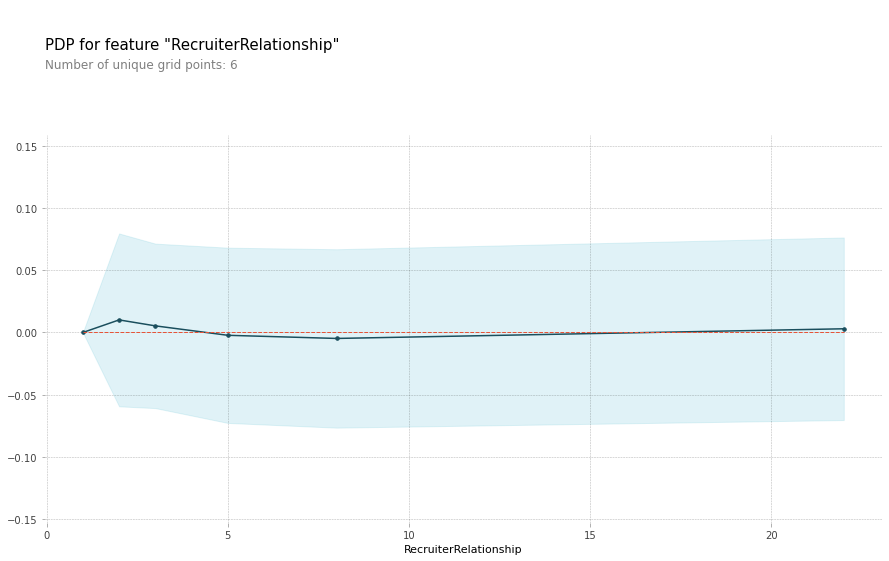

In [ ]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'RecruiterRelationship'	#CountryOfExploitation
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [ ]:
# Look at the encoder's mappings
encoder.mapping# Look at the encoder's mappings
encoder.mapping

[{'col': 'Datasource', 'data_type': dtype('O'), 'mapping': Case Management    1
  Hotline            2
  NaN               -2
  dtype: int64},
 {'col': 'ageBroad', 'data_type': dtype('O'), 'mapping': 18--20     1
  21--23     2
  24--26     3
  27--29     4
  30--38     5
  9--17      6
  -99        7
  0--8       8
  39--47     9
  48+       10
  NaN       -2
  dtype: int64},
 {'col': 'majorityStatus', 'data_type': dtype('O'), 'mapping': Adult    1
  Minor    2
  -99      3
  NaN     -2
  dtype: int64},
 {'col': 'majorityStatusAtExploit',
  'data_type': dtype('O'),
  'mapping': -99      1
  Minor    2
  Adult    3
  -99      4
  NaN     -2
  dtype: int64},
 {'col': 'majorityEntry', 'data_type': dtype('O'), 'mapping': -99      1
  Minor    2
  Adult    3
  NaN     -2
  dtype: int64},
 {'col': 'citizenship',
  'data_type': dtype('O'),
  'mapping': Colombia                             1
  Moldova                              2
  Romania                              3
  Ukraine           

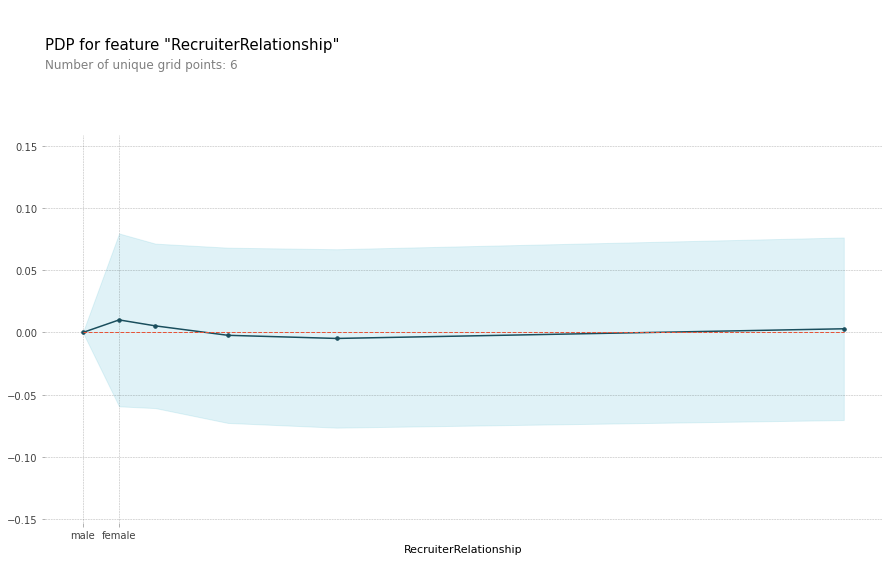

In [ ]:
pdp.pdp_plot(pdp_dist, feature)

# Manually change the xticks labels
plt.xticks([1, 2], ['male', 'female']);

In [ ]:
# Let's automate it

feature = 'RecruiterRelationship'
for item in encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping']
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

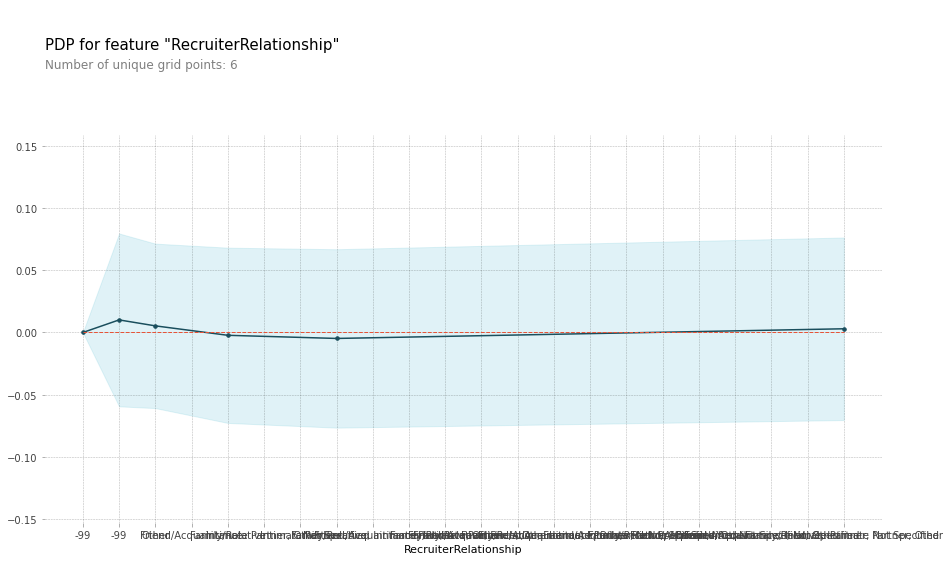

In [ ]:
pdp.pdp_plot(pdp_dist, feature)

# Automatically change the xticks labels
plt.xticks(category_codes, category_names);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


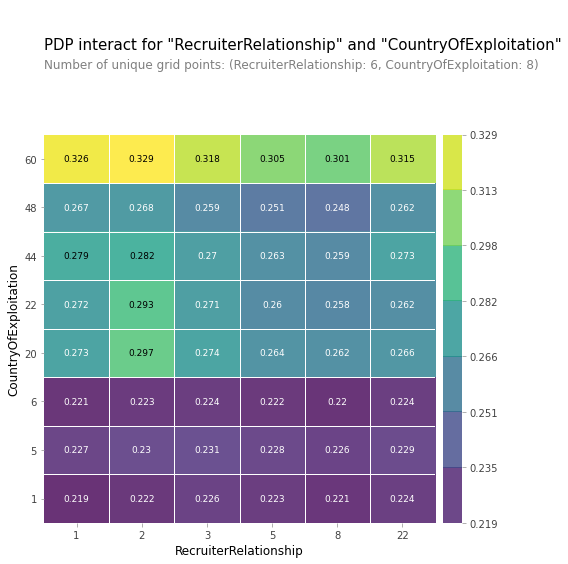

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['RecruiterRelationship', 'CountryOfExploitation']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

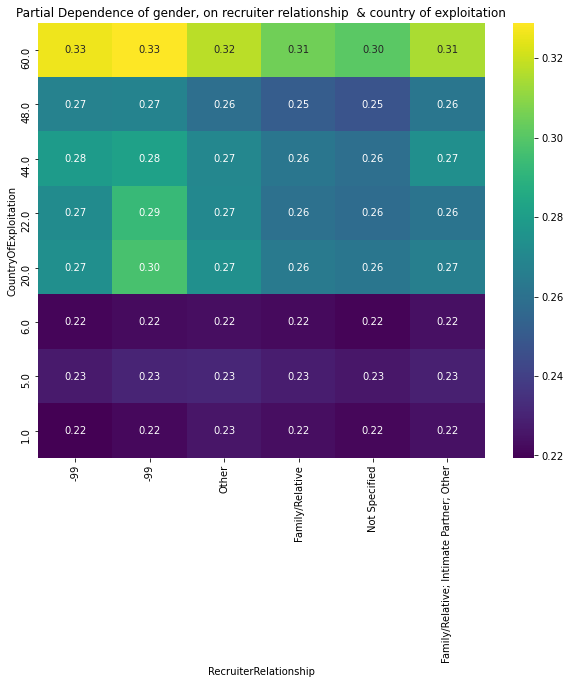

In [ ]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], # First feature on x axis
    index=features[1]    # Next feature on y axis
)[::-1]  # Reverse the index order so y axis is ascending

pdp = pdp.rename(columns=dict(zip(category_codes, category_names)))
plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('Partial Dependence of gender, on recruiter relationship  & country of exploitation');

## PDP with numerical features


In [ ]:
# trafficking.dtypes

In [ ]:
# target = 'yearOfRegistration'
# features = trafficking.columns.drop(['Datasource', 'gender', 'ageBroad', 'majorityStatus'])

# X_train = train[features]
# y_train = train[target]

# X_val = val[features]
# y_val = val[target]

# X_test = test[features]
# y_test = test[target]

In [ ]:

# %matplotlib inline
# import seaborn as sns
# sns.distplot(y_train);

In [ ]:
# import category_encoders as ce
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# lr = make_pipeline(
#     ce.TargetEncoder(),  
#     LinearRegression()
# )

# lr.fit(X_train, y_train)
# print('Linear Regression R^2', lr.score(X_val, y_val))

In [ ]:
# coefficients = lr.named_steps['linearregression'].coef_
# pd.Series(coefficients, features)

In [ ]:
# from sklearn.metrics import r2_score
# from xgboost import XGBRegressor

# gb = make_pipeline(
#     ce.OrdinalEncoder(), 
#     XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
# )

# gb.fit(X_train, y_train)
# y_pred = gb.predict(X_val)
# print('Gradient Boosting R^2', r2_score(y_val, y_pred))

In [ ]:
# # Later, when you save matplotlib images to include in blog posts or web apps,
# # increase the dots per inch (double it), so the text isn't so fuzzy
# import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi'] = 72

In [ ]:
# from pdpbox.pdp import pdp_isolate, pdp_plot

# feature = 'yearOfRegistration' #define feature for plot 


# isolated = pdp_isolate(
#     model=gb, #specify model
#     dataset=X_val, #specify dataset (validation)
#     model_features=X_val.columns, #specify all the features
#     feature=feature 
# )

In [ ]:
# pdp_plot(isolated, feature_name=feature);

In [ ]:
# # Plot PDP with ICE curves
# # PDP: Partial Dependence Plot
# # ICE: Individual Conditional Expectation
# pdp_plot(isolated
#          ,feature_name=feature
#          ,plot_lines=True #each line represents a different observation of our validation set
#          ,frac_to_plot=0.1 #plot 1% of lines
#          )


In [ ]:
# pdp_plot(isolated, feature_name=feature, plot_lines=True, 
#          frac_to_plot=0.01)


In [ ]:
# from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [ ]:
# features = ['yearOfRegistration', 'Persons']

# interaction = pdp_interact(
#     model=gb, #model 
#     dataset=X_val, #dataset
#     model_features=X_val.columns, #all x variables in model
#     features=features 
# )

In [ ]:
# pdp_interact_plot(interaction, plot_type='grid', 
#                   feature_names=features);